# Continuação do Estudo de Investimento de Startups

Aqui continuamos o estudo acerca dos investimentos em Startups, investigando nesse momento a relações entre os produtos desenvolvidos pelas startups e os aportes de investidores de risco, tentando descobrir se há relações e padrões possíveis de serem identificados e entendidos, uma vez que insights relacionados a essa questão podem ser valiosos para guiar a AEB em suas ações como fomentadora do mercado espacial nacional, possivelmente com foco em modelos de negócio inovadores

*Olhar para fora para aprender o que fazer aqui dentro*

# Inicialização do Código e exportação das bases de dados

Serão utilizadas as seguintes bases de dados:



*   Investimentos em startups nos anos de 2020 e 2021 retirados do site StartupTalky 
*   Dados acerca de Constelações de satélites e veículos Lançadores desenvolvidos por startups, além de uma relação de fundos de investimento que aportam em negócios espaciais



We start by importing everything it'll be needed to the program: pandas, numpy and matplotlib modules as well as the databases

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Since this study and report was made entirely on Google Colab, the files were uploaded to Google Drive and then pulled from there, since their extractiom and treatment was already done previously.

In [ ]:
deals_database = pd.read_excel('/content/drive/MyDrive/Dados/Invest Startups 2020-21/aportes_em_startups_2020_e_2021.xlsx')
satellite_constellation = pd.read_excel('/content/drive/MyDrive/Dados/New Space Index/constelacoes_de_satelites_newspaceindex_dados_tratados.xlsx')
launch_vehicles = pd.read_excel('/content/drive/MyDrive/Dados/New Space Index/veiculos_lancadores_newspaceindex_dados_tratados.xlsx')
space_funders = pd.read_excel('/content/drive/MyDrive/Dados/New Space Index/financiadores_espaciais_newspaceindex_dados_tratados.xlsx')

Quickly checking the data for any inconsistency

In [ ]:
deals_database.info()
print('\n')
satellite_constellation.info()
print('\n')
launch_vehicles.info()
print('\n')
space_funders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11970 entries, 0 to 11969
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investidores            11966 non-null  object 
 1   Valor                   11969 non-null  float64
 2   Rodada de Investimento  11966 non-null  object 
 3   Empresa                 11970 non-null  object 
 4   Sede (Cidade)           10038 non-null  object 
 5   Sede (Estado-US/País)   11968 non-null  object 
 6   Setor                   11966 non-null  object 
 7   Sobre a Empresa         11917 non-null  object 
 8   Mês                     11970 non-null  object 
 9   Ano                     11970 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 935.3+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                -------

Now we can begin the analysis.

# Apendix - Special Functions

Here will be transcripted the source code for functions crafted in the process of manipulating the data utilized throughout the study.

## Keyword Filter

This function searcher for a specific string on a specific column from the dataframe. It is the main tool for filtering the dataframe used in the study. Here, only one keyword and one 

In [ ]:
def keywordFilter(dataframe,column_name,keyword):
  dataframe_filtered = dataframe.copy()
  dataframe_filtered.dropna(subset=[column_name], inplace=True)
  keyword_matches = [True if re.search(keyword, cell, flags=re.I) else False for cell in dataframe_filtered[column_name]]
  return dataframe_filtered.loc[keyword_matches].reset_index(drop=True)

In [ ]:
  # Test
  keywordFilter(deals_database,'Sede (Estado-US/País)', 'Brazil')

,Investidores,Valor,Rodada de Investimento,Empresa,Sede (Cidade),Sede (Estado-US/País),Setor,Sobre a Empresa,Mês,Ano
0,"AB seed, Order",2400000.0,U,Leads2b,NaN,Brazil,Adtech/Martech,B2B Marketinng Effort Sharing Company For Smes,Janeiro,2020
1,Astella Investimentos.,4900000.0,U,Kenoby,NaN,Brazil,Enterprise,Hr Recruitment Platform,Janeiro,2020
2,"Vulcan Capital, Andreessen Horowitz, participa...",175000000.0,C,Loft,Sao Paulo,Brazil,Proptech,Apartment Pricing Transparency And Auatomation...,Janeiro,2020
3,Unbox Capital/,40000000.0,U,Solinftec,São Paulo,Brazil,Agtech,Data Insights For Farm Use,Fevereiro,2020
4,"Global Founders Capital, Kaszek Ventures, Canary",10000000.0,A,SouSmile,São Paulo,Brazil,Biotech/Health,D2C Dental Services With Retail Locations,Março,2020
...,...,...,...,...,...,...,...,...,...,...
71,"SoftBank Latin America Fund, participation fro...",115000000.0,U,Open Co,NaN,Brazil,Fintech,Consumer Credit Platform,Dezembro,2021
72,Wellington Management/,186000000.0,E,Olist,NaN,Brazil,Enterprise,E-Commerce Marketplace Integrator,Dezembro,2021
73,"Monashees, Valor Capital Group",20000000.0,Seed,BHub,NaN,Brazil,Enterprise,Full Back-Office Saas Smes,Dezembro,2021
74,"Valor Capital Group, ONEVC, participation from...",4500000.0,U,Clubbi,NaN,Brazil,Enterprise,B2B Platform For Small Food Retailers,Dezembro,2021


## Adjusting Investment Round Labels

To ease the analysis regarding the investment, the different investment labels existing in the original deals database were condensed in simpler labels

In [ ]:
def adjustingRoundLabels(dataframe):
  adjusted_dataframe = dataframe.copy()
  round_angel = ['Angel', 'Angel/Seed']
  round_seed = ['A/Seed','Seed/A','Pre-Seed','Pre-Seed/Seed','Pre-seed','Post-Seed','Seed','Seed Extension','Seed II','Seed+','Seed-2','Seed-Extension','Seed/A','Seed/Debt','Seed/Pre-Seed','Seeed','in two seed rounds']
  round_a = ['a','A','A+','A++','A-1','A-2','A-3','A-Extension','A/B','A/Debt','A1','A2','A3', 'Debt/A', 'Prea-A', 'Pre-A', 'Series A']
  round_b = ['B','B+','B-1','B-2','B-Extension','B/C','B/Debt','B1','B2','BB', 'Debt/B', 'Pre-B', 'Series B']
  round_c = ['C','C+','C-1','C-Extension','C/Debt','C1','C2', 'Debt & C', 'Pre-C', 'Series C', 'over two C rounds']
  round_d = ['D','D+','D+/E','D-2','D-Extension','D/Bridge','D/Debt','D/Equity','D/Pre-IPO','D1','D2', 'Series D']
  round_e = ['E','E+','E-Extensionn','E/Debt','E2','Series E']
  round_f_or_more = ['F','G','G-Extension','G-extension','G/Debt','Growth Financing','H','I','J', 'Pre-IPO', 'Series F']
  adjusted_dataframe.loc[[True if round in round_seed else False for round in adjusted_dataframe['Rodada de Investimento']],'Rodada de Investimento'] = 'Seed'
  adjusted_dataframe.loc[[True if round in round_a else False for round in adjusted_dataframe['Rodada de Investimento']],'Rodada de Investimento'] = 'A'
  adjusted_dataframe.loc[[True if round in round_b else False for round in adjusted_dataframe['Rodada de Investimento']],'Rodada de Investimento'] = 'B'
  adjusted_dataframe.loc[[True if round in round_c else False for round in adjusted_dataframe['Rodada de Investimento']],'Rodada de Investimento'] = 'C'
  adjusted_dataframe.loc[[True if round in round_d else False for round in adjusted_dataframe['Rodada de Investimento']],'Rodada de Investimento'] = 'D'
  adjusted_dataframe.loc[[True if round in round_e else False for round in adjusted_dataframe['Rodada de Investimento']],'Rodada de Investimento'] = 'E'
  adjusted_dataframe.loc[[True if round in round_f_or_more else False for round in adjusted_dataframe['Rodada de Investimento']],'Rodada de Investimento'] = 'F+'
  adjusted_dataframe = orderingByAscendingRounds(adjusted_dataframe)
  return adjusted_dataframe

## Ordering by Ascending Rounds

In [ ]:
def orderingByAscendingRounds(dataframe):
  ordered_dataframe = dataframe.copy()
  ordered_dataframe['Round Order'] = 7
  avalible_rounds = ['Seed', 'A', 'B', 'C', 'D', 'E', 'F+']
  counter = 0
  for round in avalible_rounds:
    ordered_dataframe.loc[ordered_dataframe['Rodada de Investimento'] == round,'Round Order'] = counter
    counter +=1
  ordered_dataframe.sort_values(by='Round Order', inplace=True)
  ordered_dataframe.drop('Round Order', axis = 'columns', inplace=True)
  return ordered_dataframe

In [ ]:
#orderingByAscendingRounds(space_deals)

# Exploratory Analysis

In this first moment, the objective is to start playing with the data and asking questions, while keeping in mind the final goal, to know the profile of both businesses and investors and get insights about their rationality.

The first thing I'll do is to try to find satellite and laucher startups in the deals database. So starting with looking for all the deals related with the space sector 

In [ ]:
space_deals = keywordFilter(deals_database,'Setor', 'Space')
space_deals = adjustingRoundLabels(space_deals)


Some adjustments are made to the database to correct some data and to ease further analysis

In [ ]:
space_deals.loc[space_deals['Empresa'] == 'Aerospace','Empresa'] = 'Isar Aerospace'
space_deals.loc[space_deals['Empresa'] == 'ABL Space','Empresa'] = 'ABL Space Systems'
space_deals.loc[space_deals['Empresa'] == 'Agnikul','Empresa'] = 'Agnikul Cosmos'

Now, here there's a problem. Companies' names are not written in the same way in the three databases, so the program needs to evaluate the names and make a decision, wether 2 strings represent the same company or not.

To do that, the SequenceMatcher function will be used, a method that python features natively and can provide the similarity ratio between the 2 strings. 

In [ ]:
def stringInBothDataframes(column_in_reference_dataframe,column_in_comparing_dataframe, appended_string='r'):
  from difflib import SequenceMatcher
  strings_in_both_dataframes = []
  for reference_string in column_in_reference_dataframe:
    for comparing_string in column_in_comparing_dataframe:

      if len(reference_string) > len(comparing_string):
        long_string, short_string = reference_string.lower(), comparing_string.lower()
      else:
        long_string, short_string = comparing_string.lower(), reference_string.lower()

      similarity =  SequenceMatcher(None, long_string,short_string).ratio()

      if short_string in long_string:
        if ' ' in long_string:
          if similarity > 0.4:
            if appended_string == 'r':
              strings_in_both_dataframes.append(reference_string)
            else:
              strings_in_both_dataframes.append(comparing_string)
            break
        else: 
          if similarity > 0.8:
            if appended_string == 'r':
              strings_in_both_dataframes.append(reference_string)
            else:
              strings_in_both_dataframes.append(comparing_string)
            break
  return list(set(strings_in_both_dataframes))

It's good to point out that this method won't give 100% accuracy in the output, some companies may be wrongly included, and others may be missed and left out, but the results even out and it is possible to take the output to procede with further analysis. 

Also, there was the addition to the appended_string parameter, that let me choose from which dataframe the list will be created. This feature will be useful later.

In [ ]:
satellite_companies_invested_r = stringInBothDataframes(space_deals['Empresa'], satellite_constellation['Company'])
launchers_companies_invested_c = stringInBothDataframes(space_deals['Empresa'], launch_vehicles['Company'], 'c')

Now the number of satellite and launch vehicules companies that took part in funding rounds are known.

In [ ]:
len(satellite_companies_invested_r)

18

In [ ]:
len(launchers_companies_invested_c)

10

In [ ]:
satellite_companies_invested_r

['Totum Labs',
 'Astranis',
 'Axelspace',
 'Muon Space',
 'OneWeb',
 'Albedo',
 'PredaSAR',
 'HawkEye 360',
 'Satellite Vu',
 'Pixxel',
 'Hiber',
 'Myriota',
 'Xona Space Systems',
 'Transcelestial',
 'LyteLoop',
 'Alba Orbital',
 'Hydrosat',
 'ICEYE']

In [ ]:
launchers_companies_invested_c

['Phantom Space',
 'Galactic Energy (Beijing Xinghe Dongli Space Technology)',
 'STOKE Space Technologies',
 'Gilmour Space',
 'Relativity Space',
 'Firehawk Aerospace',
 'SpinLaunch',
 'Isar Aerospace',
 'ABL Space Systems',
 'Agnikul Cosmos']

In [ ]:
launchers_companies_invested_r = stringInBothDataframes(space_deals['Empresa'], launch_vehicles['Company'])
launchers_companies_invested_r

['Phantom Space',
 'Stoke Space Technologies',
 'Gilmour Space',
 'Relativity Space',
 'Firehawk Aerospace',
 'SpinLaunch',
 'Isar Aerospace',
 'Agnikul Cosmos',
 'ABL Space Systems',
 'Galactic Energy']

That is interesting. Roughly a third of the venture capital (28 out of 93) is going to startups involved with core space technology. That leaves two questions:



*   What are the other two thirds of space deals about?
*   What are the caracteristics about these investments?




Let's start adressing the first question:

To have a greater overview about what these other deals target, it can be a good idea to analise the number of words that appear in the company's description. It won't give a definite anwser, but may start to guide the investigation in the right direction

In [ ]:
def word_frequency_ranking(dataframe_column, n_words= -1,stopwords=[]):
  import nltk
  from nltk.tokenize import word_tokenize
  from nltk.probability import FreqDist
  nltk.download('punkt')

  all_cells_string = ' '.join(list(dataframe_column.dropna()))
  
  word_frequency = FreqDist(word.lower() for word in word_tokenize(all_cells_string))
  ranking_list = [(word, frequency) for word, frequency in word_frequency.most_common() if word not in stopwords]
  return ranking_list[:n_words]

In [ ]:
not_sat_or_launcher_space_deals = space_deals.loc[[False if company in satellite_companies_invested_r+launchers_companies_invested_c else True for company in space_deals['Empresa']]]
stopwords = ['and', 'for','to', 'that', 'the', ',', '.', 'etc', 'of', 'in', 'with', 'aircraft', 'aerial']

Now let's visualize the word frequecy in the remaining space deals. To generate meaninful insigths, checking the 15 most popular words are enough

In [ ]:
word_frequency_ranking(not_sat_or_launcher_space_deals['Sobre a Empresa'], 15,stopwords=stopwords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('space', 13),
 ('platform', 12),
 ('satellite', 8),
 ('propulsion', 7),
 ('launch', 5),
 ('satellites', 5),
 ('data', 4),
 ('commercial', 4),
 ('startup', 4),
 ('private', 4),
 ('spacecraft', 3),
 ('on-orbit', 3),
 ('provider', 3),
 ('services', 3),
 ('infrastructure', 3)]

There are some information it can be infered from here. 



*   "Satellite" and "Satellites", combined, make up to the first place along with the term "Space" in term popularity in startups description. That fact points to the idea that satellite-related solutions are still among the most atractive ventures for institucional investors.
*   The term "Platform" appears in second place, and in the database describes both solutions related to rocket launching platform and space-based intelligence platforms, that points to the space infrastructure area that is flourishing.
*   "Propulsion" it's also something that deserves some atention. It is relatively high up in the list of terms, and may indicates that this is an area that businesses are starting to explore.





Adressing the second question

In [ ]:
space_deals_round_analysis = space_deals.copy()
space_deals_round_analysis['Product Type'] = 'Other'
space_deals_round_analysis.loc[[True if company in satellite_companies_invested_r else False for company in space_deals_round_analysis['Empresa']],'Product Type'] = 'Satellite'
space_deals_round_analysis.loc[[True if company in launchers_companies_invested_r else False for company in space_deals_round_analysis['Empresa']],'Product Type'] = 'Launcher'

In [ ]:
space_deals_round_analysis

,Investidores,Valor,Rodada de Investimento,Empresa,Sede (Cidade),Sede (Estado-US/País),Setor,Sobre a Empresa,Mês,Ano,Product Type
46,Seraphim Capital,5000000.0,Seed,Satellite Vu,London,U.K.,Aerospace,Infrared/Emission Earth Imaging Platform,Abril,2021,Satellite
43,"Prime Movers Lab, participation from Draper As...",3000000.0,Seed,Venus Aerospace,Houston,Texas,Aerospace,Mach 12 Hypersonic Aircraft Designed To Travel...,Março,2021,Other
27,"Founders Fund, participation from Luminous Ven...",1900000.0,Seed,Magdrive,NaN,U.K.,Aerospace,Spacecraft Propulsion System,Dezembro,2020,Other
20,"Canaan Partners, participation from Khosla Ven...",16000000.0,Seed,Hermeus,Atlanta,GA,Aerospace,Mach 5 Aircraft,Outubro,2020,Other
28,Munich Re Ventures/,6000000.0,Seed,Orbit Fab,San Francisco,Calif.,Aerospace,In-Space Tugs That Can Guide Spacecraft On-Orb...,Dezembro,2020,Other
...,...,...,...,...,...,...,...,...,...,...,...
32,Primo Space Fund/,1800000.0,U,Aiko,Turin,Italy,Aerospace,Ai Platform For Automation Of Space Missions,Dezembro,2020,Other
30,"Vector Venture Capital, participation from SEK...",3500000.0,U,D3 Technologies,Munich,Germany,Aerospace,Software Developer For The Aviation Industry,Dezembro,2020,Other
29,"BGF, Octopus Ventures, participation from High...",24000000.0,U,Orbex,NaN,U.K.,Aerospace,Rocket Launching Platform,Dezembro,2020,Other
58,"Nelnet, participation from Invest Nebraska, Ne...",1700000.0,U,Maptician,Atlanta,Ga.,Aerospace,Intelligent Space And Occupancy Management,Maio,2021,Other


In [ ]:
space_deals_round_analysis[space_deals_round_analysis['Product Type'] == 'Satellite']

,Investidores,Valor,Rodada de Investimento,Empresa,Sede (Cidade),Sede (Estado-US/País),Setor,Sobre a Empresa,Mês,Ano,Product Type
46,Seraphim Capital,5000000.0,Seed,Satellite Vu,London,U.K.,Aerospace,Infrared/Emission Earth Imaging Platform,Abril,2021,Satellite
64,"Cultivation Capital, participation from Freefl...",5000000.0,Seed,Hydrosat,Washington,D.C.,Aerospace,Infrared Satellite Constellation,Junho,2021,Satellite
15,"Lightspeed India Partners, participation from ...",5000000.0,Seed,Pixxel,Bengaluru,India,Spacetech,Earth-Imaging Satellites,Agosto,2020,Satellite
56,"Metaplanet Holdings, participation by Y Combin...",3400000.0,Seed,Alba Orbital,Glasgow,U.K.,Aerospacee,Orbital Iimagery,Maio,2021,Satellite
9,Rokk3r Fuel/,25000000.0,Seed,PredaSAR,Boca Raton,FL,Spacetechc,Sythetic Aperature Radar,Março,2020,Satellite
86,"Costanoa Ventures, participation from Space Ca...",10000000.0,Seed,Muon Space,Mountain View,Calif.,Aerospace,Climate-Focused Satellite Constellation,Outubro,2021,Satellite
47,"Initialized Capital, participation from Jetstr...",10000000.0,Seed,Albedo,Denver,Colo.,Aerospace,Constellation Of Low-Orbit Satellites For High...,Abril,2021,Satellite
11,"1517, participation from Seraphim Capital, Tru...",1000000.0,Seed,Xona Space Systems,San Mateo,CA,Spacetech,"High-Accuracy Satellite Position, Navigation, ...",Maio,2020,Satellite
24,"Heroic Ventures, Space Capital, participation ...",13000000.0,A,Totum Labs,San Diego,CA,Aerospace,Satellite Iot Connectivity Functionality,Novembro,2020,Satellite
12,"EDBI, Wavemaker/",9600000.0,A,Transcelestial,NaN,Singapore,Spacetech,Space-Based Laser Communications Platform,Julho,2020,Satellite


## Graphic Visualizations

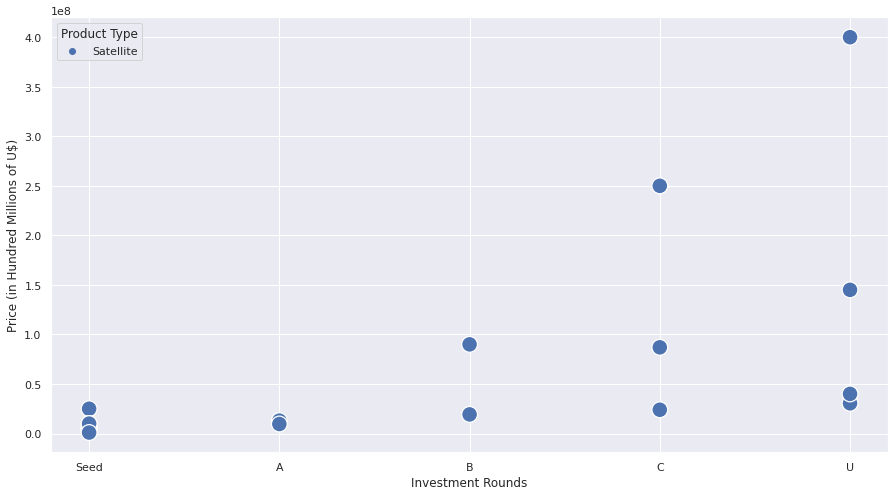

In [ ]:
import seaborn as sns
sns.set_theme()
plt.figure(figsize=(15,8))
selecao = (space_deals_round_analysis['Product Type'] == 'Satellite')
p1 = sns.scatterplot(x=space_deals_round_analysis[selecao]['Rodada de Investimento'], 
                y=space_deals_round_analysis[selecao]['Valor'],
                hue=space_deals_round_analysis[selecao]['Product Type'],
                s=250)
plt.xlabel("Investment Rounds")
plt.ylabel("Price (in Hundred Millions of U$)")
plt.title('')
plt.show()

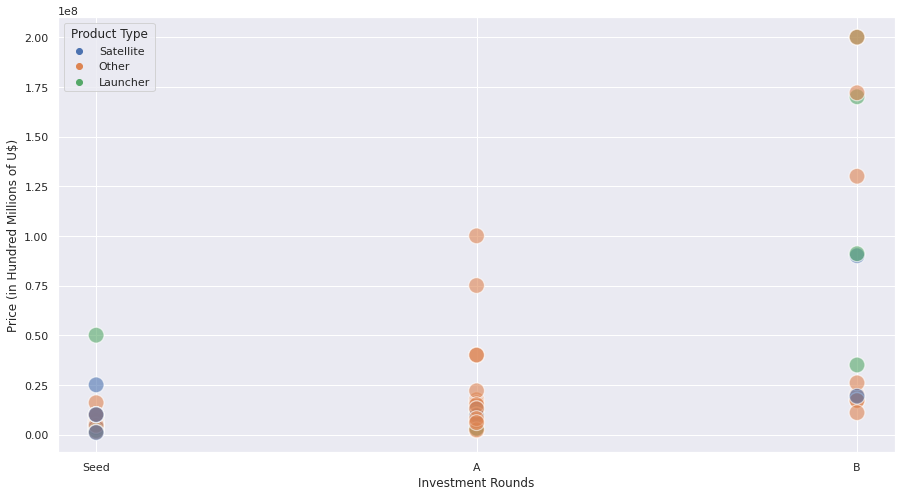

In [ ]:
early_rounds = [True if round in ['Seed','A','B'] else False for round in space_deals_round_analysis['Rodada de Investimento']]
less_than_100M = [True if round < 0.3e8 else False for round in space_deals_round_analysis['Valor']]

plt.figure(figsize=(15,8))
sns.scatterplot(x=space_deals_round_analysis.loc[early_rounds]['Rodada de Investimento'], 
                y=space_deals_round_analysis.loc[early_rounds]['Valor'],
                hue=space_deals_round_analysis.loc[early_rounds]['Product Type'],
                s=250,
                alpha=0.6,
                y_jitter=1)
plt.xlabel("Investment Rounds")
plt.ylabel("Price (in Hundred Millions of U$)")
plt.title('')
plt.show()

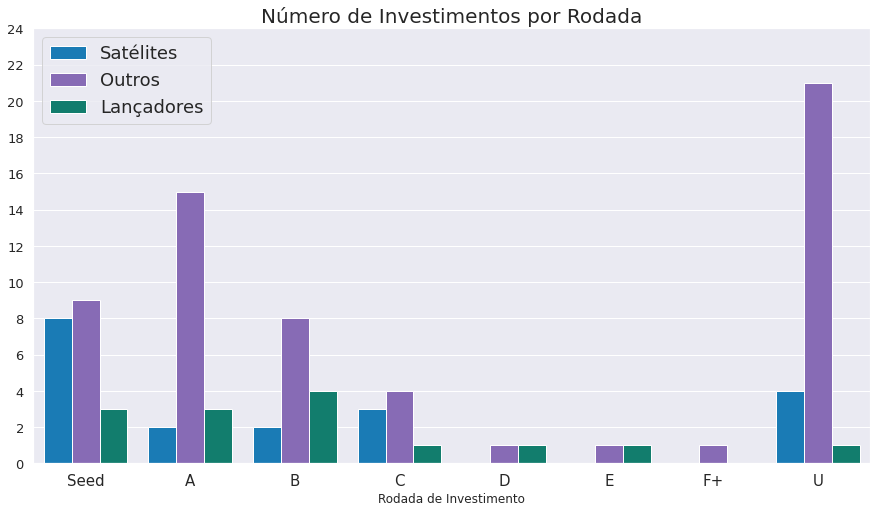

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(
    x = 'Rodada de Investimento',
    hue = 'Product Type',
    data = space_deals_round_analysis,
    palette = ['#0081cf', '#845ec2', '#008f7a']
    )
plt.yticks([*range(0,25,2)], fontsize = 13)
plt.xticks(fontsize = 15)
plt.legend(['Satélites', 'Outros', 'Lançadores'], fontsize=18)
plt.title('Número de Investimentos por Rodada', fontsize = 20)
plt.ylabel('')
plt.savefig('n_investimentos_por_rodada.png', bbox_inches='tight')
plt.show()

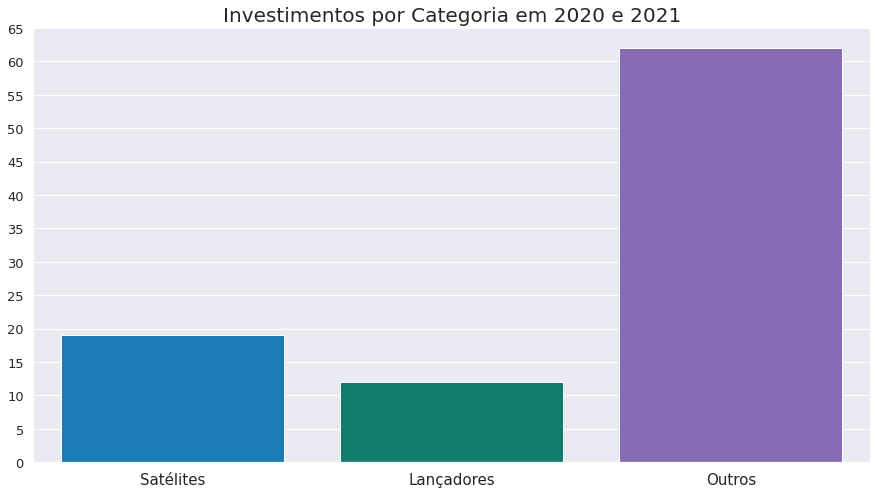

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(
    x = 'Product Type',
    data = space_deals_round_analysis,
    order = ['Satellite','Launcher','Other'],
    palette = ['#0081cf', '#008f7a', '#845ec2'],
    #fontsize = 15
    )
plt.yticks([*range(0,66,5)], fontsize = 13)
plt.title('Investimentos por Categoria em 2020 e 2021', fontsize=20)
plt.xticks([0, 1, 2], labels=['Satélites', 'Lançadores', 'Outros'],fontsize = 15)
plt.ylabel('')
plt.xlabel('')
plt.savefig('investimentos_2020_e_2021_categoria.png', bbox_inches='tight')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


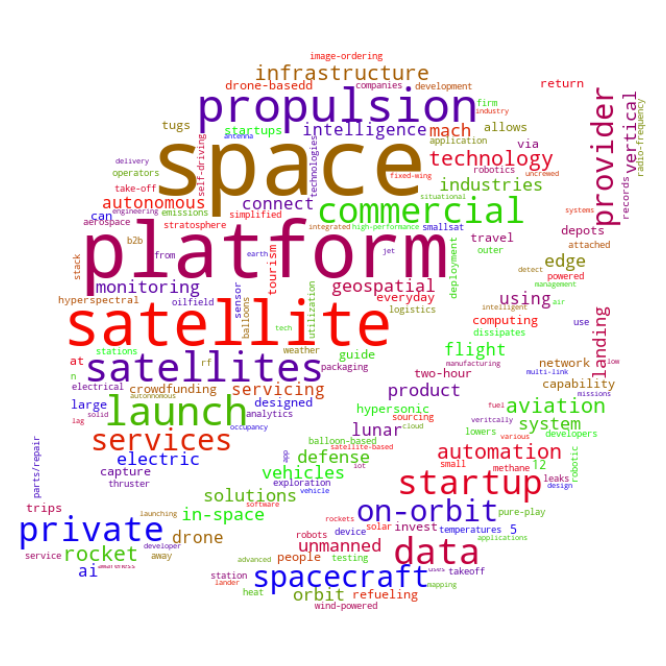

In [ ]:
from wordcloud import WordCloud
from PIL import Image

freq_list = word_frequency_ranking(not_sat_or_launcher_space_deals['Sobre a Empresa'],stopwords=stopwords)

link = '/content/drive/MyDrive/Dados/New Space Index/681645a9fabb2d2f319b139cfb81e72f.jpg'
mask = np.array(Image.open(link))

cloud = WordCloud(
    width=2400, 
    height = 1600, 
    background_color='white', 
    max_words = 300,
    colormap = 'brg',
    mask = mask,
    contour_width=0,
    contour_color='black'
    )

cloud.generate_from_frequencies(dict(freq_list))

fig, ax = plt.subplots(figsize=(12,12))
plt.axis('off')
ax.imshow(cloud, interpolation="bilinear")
plt.savefig('outros_nuvem_de_palavras.png', bbox_inches='tight')
#plt.show()

# Diving into invested Companies

Let's continue the search, looking at the companies standpoint: what are the similarities between satellite-related and launch vehicle-related startups that got invested in the last 2 years? Finding this anwser may give us valuable insights about what were the main investment thesis from the last couple of years 

Starting with satellite constelation companies. Now I'll make use of the appended string parameter. Calling the stringInBothDataframes function again, but modifying the 'r' to 'c', we got the same list but the companies names are written as it is in the new space index database.

In [ ]:
satellite_companies_invested_c = stringInBothDataframes(space_deals['Empresa'], satellite_constellation['Company'],'c')
satellite_companies_invested_c

['Totum Labs',
 'Astranis',
 'Axelspace',
 'Muon Space',
 'OneWeb',
 'HawkEye 360',
 'Pixxel',
 'SatelliteVu (Satellite Vu)',
 'Hiber',
 'PredaSAR (Terran Orbital)',
 'Myriota',
 'Transcelestial Technologies',
 'Xona Space Systems',
 'Albedo Space',
 'LyteLoop',
 'Alba Orbital',
 'Hydrosat',
 'ICEYE']

This way makes it easier to extract a dataframe containing only these companies

In [ ]:
satellite_companies_invested_dataframe = satellite_constellation.loc[[True if company in satellite_companies_invested_c else False for company in satellite_constellation['Company']]].copy()
satellite_companies_invested_dataframe.sort_values(by='Company', inplace=True)
satellite_companies_invested_dataframe.reset_index(drop=True, inplace=True)

In [ ]:
satellite_companies_invested_dataframe

,Company,Country,Founded,Constellation name,Constellation field,Constellation info,Constellation status,Launched satellites,Planned satellites,Form factor,Orbit,First launch,Schedule tracking,Funding,Manufacturer
0,Alba Orbital,UK,2013,NaN,"Earth Observation, Optical, Night Lights",First Earth Observation constellation with Poc...,Launches ongoing,7,?,PocketQube,LEO,2019,NaN,$3.4M+,In-house
1,Albedo Space,US,2020,NaN,"Earth Observation, Optical, Infrared, VLEO",10 centimeter visible imagery. Co-collected wi...,Prototype development,0,24,"Smallsat, ?",VLEO,2024,NaN,$10M+,In-house
2,Astranis,US,2015,MicroGEO,Internet,Ssmall GEO satellite weighing 300 kg to provid...,Prototype development,1,?,Smallsat,GEO,2018,NaN,$350M+,In-house
3,Axelspace,Japan,2008,GRUS,"Earth Observation, Optical",Weighs < 95 kg and captures images with a 2.5-...,Launches ongoing,9,50,Microsat,LEO,2019,NaN,$39.8M,In-house
4,HawkEye 360,US,2015,NaN,"RF Spectrum Monitoring, RF Geolocation",Radio frequency (RF) mapping with 15 kg sats t...,Launches ongoing,15,21,Microsat,LEO,2018,"Years behind""Launch first three satellites — t...",$299.3M,SFL (Space Flight Laboratory)
5,Hiber,Netherlands,2016,NaN,IoT / M2M,"Send small packets of data (140 characters, ac...","Cancelled, Launches ongoing",4,48,"6U, 3U",LEO,Cancelled,"Partially behind""Vector Announces Dedicated La...",$43.9M,"Space Inventor, ISISpace"
6,Hydrosat,US,2017,NaN,"Earth Observation, Infrared",First commercial space-based thermal imagery t...,Prototype development,0,16,"Microsat, ?",LEO,2023,NaN,$15.6M,"Loft Orbital, ?"
7,ICEYE,Finland,2015,NaN,"SAR, Earth Observation",One hosted payload on York Space Systems.,Launches ongoing,21,18,Microsat,LEO,2018,"Year behind""ICEYE plans to launch nine SAR sat...",$304M,In-house
8,LyteLoop,US,2015,NaN,Data Storage,Planning to store massive amounts of data by m...,Early stage,0,?,Microsat,LEO,2022,NaN,$40M,?
9,Muon Space,US,2021,NaN,"Earth Observation, Optical, Hyperspectral",World's most capable multi-modal satellite rem...,Prototype development,0,?,?,LEO,?,NaN,$10M,?


From the visualization alone, there are some information that can be concluded: 


*   The overwhelming majority of satellite constellations operate (or are planned to operate) in LEO, ilustrating the window of oportunities of the New Space framework: LEO is inheritly cheaper to reach, reducing operational costs and turning the business model viable. 

*   Also, the majority of startups invested in the last two years are US-based. That goes to show the supremacy of the american market in the sector



To make ir easier to procede, I'll modify the names of the companies in this dataframe to make it similar to those on the deals_database

In [ ]:
satellite_companies_invested_dataframe['Company'] = sorted(satellite_companies_invested_r)

Now, I'll group these companies by their investment rounds and see if any pattern can be identified

In [ ]:
def groupingByInvestmentRounds(companies_list,deals_dataframe,company_column,round_column):
  round_invested_companies = pd.DataFrame('-',
                                          index = ['Seed', 'A', 'B', 'C', 'D', 'E', 'F+','U'],
                                          columns = ['Companies'])
  round_invested_companies.index.name = 'Investment Round'
  deals_dataframe = adjustingRoundLabels(deals_dataframe)
  companies_selection = [True if company in companies_list else False for company in deals_dataframe[company_column]]
  for round in round_invested_companies.index:
    individual_round_dataframe = deals_dataframe[companies_selection].loc[deals_dataframe[round_column] == round].copy()
    round_invested_companies.loc[round,'Companies'] = ', '.join(list(individual_round_dataframe[company_column]))
  return round_invested_companies

In [ ]:
sat_companies_by_investment_round = groupingByInvestmentRounds(satellite_companies_invested_r,
                                                               space_deals_round_analysis,
                                                               'Empresa',
                                                               'Rodada de Investimento')
sat_companies_by_investment_round

,Companies
Investment Round,
Seed,"Satellite Vu, Xona Space Systems, Albedo, Pred..."
A,"Transcelestial, Totum Labs"
B,"Myriota, Astranis"
C,"ICEYE, Axelspace, Astranis"
D,
E,
F+,
U,"Hiber, OneWeb, LyteLoop, HawkEye 360"


The same thing should be done to launcher vehicles startups.

In [ ]:
launchers_companies_invested_dataframe = launch_vehicles.loc[[True if company in launchers_companies_invested_c else False for company in launch_vehicles['Company']]].copy()
launchers_companies_invested_dataframe.sort_values(by='Company', inplace=True)
launchers_companies_invested_dataframe.reset_index(drop=True, inplace=True)
launchers_companies_invested_dataframe.loc[8,'Company'] = 'Stoke Space Technologies'
launchers_companies_invested_dataframe.sort_values(by='Company', inplace=True)
launchers_companies_invested_dataframe['Company'] = sorted(launchers_companies_invested_r)

In [ ]:
launchers_companies_invested_dataframe

,Company,Country,Founded,Launcher name,Launcher status,First launch,Launches,Launch cost,Cost per kg,Performance,Launch type,Propellant type,Reusability,Funding
0,ABL Space Systems,US,2017,RS1,Development,2022,0,$12M,12000 $/kg,1000 kg,Land,Kerosene,Planned,$419M+
1,Agnikul Cosmos,India,2017,AgniBaan,Development,2022,0,NaN,NaN,100 kg,Land,Kerosene,Not planned,$14.5M
2,Firehawk Aerospace,US,2018,Firehawk-1,Concept,?,0,NaN,NaN,NaN,Land,Solid,Not planned,$3M+
3,Galactic Energy,China,2018,Ceres-1,Operational,2020,2,$4M,17390 $/kg,230 kg,Land,Solid,Not planned,$73M
4,Gilmour Space,"Singapore, Australia",2012,Eris,Development,2022,0,$7M,32560 $/kg,215 kg,Land,Hybrid,?,$64M
5,Isar Aerospace,Germany,2018,Spectrum,Development,2022,0,$10M,14290 $/kg,700 kg,Land,"Liquid,Propane",?,$180M+
6,Phantom Space,US,2020,Daytona-E,Development,2023,0,$4M,10810 $/kg,370 kg,Land,"Kerosene,RP-1",Not planned,$5.9M+
7,Relativity Space,US,2016,Terran 1,Development,2022,0,$12M,13330 $/kg,900 kg,Land,"Liquid,LNG",Not planned,$1.3B
9,SpinLaunch,US,2014,?,Development,2022,0,$0.5M,5000 $/kg,100 kg,Catapult,Solid,Not planned,$80M
8,Stoke Space Technologies,US,2019,?,Development,?,0,NaN,NaN,NaN,Land,?,Development,$74M+


In [ ]:
launch_companies_by_investment_round = groupingByInvestmentRounds(launchers_companies_invested_r, space_deals_round_analysis,'Empresa','Rodada de Investimento')
launch_companies_by_investment_round

,Companies
Investment Round,
Seed,"Phantom Space, Firehawk Aerospace, Stoke Space..."
A,"Agnikul Cosmos, Galactic Energy, Agnikul Cosmos"
B,"Isar Aerospace, ABL Space Systems, SpinLaunch,..."
C,Gilmour Space
D,Relativity Space
E,Relativity Space
F+,
U,ABL Space Systems


Now, let's start splitting the rounds category to search for patterns.

## Seed Round

Starting by Seed Round, and this stage is emblematic for a number of reasons. Usually is a milestone achieved by the company, the first high ticket investment it has by an institutional investor. It's the signal to the market that the company should be looked upon from that point forward. So, understanding this stage is a good step towards understanding the dynamics of investments in the space sector

### Satellite Companies

In [ ]:
seed_selection = sat_companies_by_investment_round.loc['Seed','Companies'].split(', ')
seed_selection = [True if company in seed_selection else False for company in satellite_companies_invested_dataframe['Company']]
satellite_companies_invested_dataframe[seed_selection]

,Company,Country,Founded,Constellation name,Constellation field,Constellation info,Constellation status,Launched satellites,Planned satellites,Form factor,Orbit,First launch,Schedule tracking,Funding,Manufacturer
0,Alba Orbital,UK,2013,NaN,"Earth Observation, Optical, Night Lights",First Earth Observation constellation with Poc...,Launches ongoing,7,?,PocketQube,LEO,2019,NaN,$3.4M+,In-house
1,Albedo,US,2020,NaN,"Earth Observation, Optical, Infrared, VLEO",10 centimeter visible imagery. Co-collected wi...,Prototype development,0,24,"Smallsat, ?",VLEO,2024,NaN,$10M+,In-house
6,Hydrosat,US,2017,NaN,"Earth Observation, Infrared",First commercial space-based thermal imagery t...,Prototype development,0,16,"Microsat, ?",LEO,2023,NaN,$15.6M,"Loft Orbital, ?"
9,Muon Space,US,2021,NaN,"Earth Observation, Optical, Hyperspectral",World's most capable multi-modal satellite rem...,Prototype development,0,?,?,LEO,?,NaN,$10M,?
12,Pixxel,India,2018,NaN,"Earth Observation, Hyperspectral",Constellation of cutting-edge satellites to pr...,Prototype(s) launched,1,36,"Microsat, ?, 6U",LEO,2022,"Year behind""https://techcrunch.com/2021/03/17/...",$33M+,"In-house, NanoAvionics"
13,PredaSAR,US,2018,NaN,"SAR, Earth Observation","Building, and ultimately operating, the world’...",Prototype development,0,96,Smallsat,LEO,2022,NaN,$25M,Tyvak
14,Satellite Vu,UK,2016,NaN,"Earth Observation, Infrared",World’s first ~130kg satellite that will deliv...,Prototype development,0,7,Smallsat,LEO,2022,NaN,$26M,SSTL
17,Xona Space Systems,US,2019,NaN,"GNSS, PNT (Positioning; Navigation; Timing)",Next-generation navigation system with low-cos...,Prototype development,0,300,Microsat,LEO,2022,NaN,$10M,?


Analyzing satellite constellation companies in Seed Round, There were 5 american, 2 english and 1 indian startups. 6 are developing their prototypes, 1 has lauched their prototype and only 1 is escalating the size of their constellation.

It's worth noting that Alba Orbital's constellation - the one that has seen more activity with its seven launches - rely on PocketQubes, an easier and low cost alternative to develop space technology. It is also the *least* funded constellation of the group.

It's also valueable to look for the time between the foundation of the company and the first launch of one of it's satellite (even if it's the planned date). To look for this timespan, the information regarding Muon Space will be desconsidered, since the database does not contain meaningful data about this field.


In [ ]:
sat_const_seed_selection = satellite_companies_invested_dataframe[seed_selection]

In [ ]:
def meanTimefromFoundationToLaunch(dataframe,foundation_column,launch_column):
  temp_dataframe = dataframe.copy()
  temp_dataframe.reset_index(drop=True, inplace=True)
  launch = temp_dataframe[launch_column].astype('int64')
  foundation = temp_dataframe[foundation_column].astype('int64')
  mean_time_foundation_to_launch = sum(launch-foundation)/temp_dataframe.shape[0]
  return mean_time_foundation_to_launch

In [ ]:
meanTimefromFoundationToLaunch(sat_const_seed_selection.drop(9),'Founded','First launch')

4.714285714285714

The mean time between startup foundation and the launch of their first satellite is roughly 4.71 years. That fact reveals one key aspect, very distinguished, from the space sector: The great amount of time of development needed to construct the products. Even with modern alternatives - smaller satellites, reaching from a few grams up to 10 Kg - are costly in time aspects.

Since the Seed round is usually the first major investment in the startup's idea - knowing that bootstrap and angel investments are, undoubtly, essencial inicial pushes to bring the company to life, but their ticket are lower than seed - it is interesting to point out the timespan from the foundation of the company and its seed round, and compare it to the product development time

In [ ]:
seed_selection = (space_deals_round_analysis['Product Type'] == 'Satellite') & (space_deals_round_analysis['Rodada de Investimento'] == 'Seed')
investment_year = space_deals_round_analysis[seed_selection].sort_values(by='Empresa')['Ano'].reset_index(drop=True)
foundation_year = sat_const_seed_selection['Founded'].astype('int64').reset_index(drop=True)
sum(investment_year - foundation_year)/sat_const_seed_selection.shape[0]

2.875

This is interesting. The mean time, now from the foundation of the startup to its seed round, is 2.875 years. That means that, after the investment, the satellite constellation startups go almost 2 years, on average, developing their technology to only then launch the first satellite.

This idea contributes to the fact that investments in the space sector are long term, and investors are well aware of that.

### Launch Vehicles Companies

In [ ]:
seed_selection = launch_companies_by_investment_round.loc['Seed','Companies'].split(', ')
seed_selection = [True if company in seed_selection else False for company in launchers_companies_invested_dataframe['Company']]
launchers_companies_invested_dataframe[seed_selection]

,Company,Country,Founded,Launcher name,Launcher status,First launch,Launches,Launch cost,Cost per kg,Performance,Launch type,Propellant type,Reusability,Funding
2,Firehawk Aerospace,US,2018,Firehawk-1,Concept,?,0,NaN,NaN,NaN,Land,Solid,Not planned,$3M+
6,Phantom Space,US,2020,Daytona-E,Development,2023,0,$4M,10810 $/kg,370 kg,Land,"Kerosene,RP-1",Not planned,$5.9M+
8,Stoke Space Technologies,US,2019,?,Development,?,0,NaN,NaN,NaN,Land,?,Development,$74M+


Looking at the launching vehicle startups, there's not much meaningful data to take conclusions. But as well as satellite constellation companies, the seed round is caracterized by the initial test and development of the technology

## Series A Round

Proceding to analyze the next investment round, there is data from 2 space startup deals from 2020 and 2021. The process will be analogous with that from the seed round

In [ ]:
a_selection = sat_companies_by_investment_round.loc['A','Companies'].split(', ')
a_selection = [True if company in a_selection else False for company in satellite_companies_invested_dataframe['Company']]
satellite_companies_invested_dataframe[a_selection]

,Company,Country,Founded,Constellation name,Constellation field,Constellation info,Constellation status,Launched satellites,Planned satellites,Form factor,Orbit,First launch,Schedule tracking,Funding,Manufacturer
15,Totum Labs,US,2018,NaN,IoT / M2M,"Small, low cost modules with embedded antennas...",Prototype development,1,18,6U,LEO,2021,NaN,$15.2M,?
16,Transcelestial,Singapore,2016,NaN,"Orbital Data Relay, Laser Communications",Space data network for terrestrial and satelli...,Unknown,0,?,CubeSat?,LEO,?,"Years behind""2019""",$11.4M,?


In [ ]:
a_selection = launch_companies_by_investment_round.loc['A','Companies'].split(', ')
a_selection = [True if company in a_selection else False for company in launchers_companies_invested_dataframe['Company']]
launchers_companies_invested_dataframe[a_selection]

,Company,Country,Founded,Launcher name,Launcher status,First launch,Launches,Launch cost,Cost per kg,Performance,Launch type,Propellant type,Reusability,Funding
1,Agnikul Cosmos,India,2017,AgniBaan,Development,2022,0,NaN,NaN,100 kg,Land,Kerosene,Not planned,$14.5M
3,Galactic Energy,China,2018,Ceres-1,Operational,2020,2,$4M,17390 $/kg,230 kg,Land,Solid,Not planned,$73M


From now on, the little data avaible of greater rounds makes it tricky to draw any conclusions.

## Series B Round

In [ ]:
b_selection = sat_companies_by_investment_round.loc['B','Companies'].split(', ')
b_selection = [True if company in b_selection else False for company in satellite_companies_invested_dataframe['Company']]
satellite_companies_invested_dataframe[b_selection]

,Company,Country,Founded,Constellation name,Constellation field,Constellation info,Constellation status,Launched satellites,Planned satellites,Form factor,Orbit,First launch,Schedule tracking,Funding,Manufacturer
2,Astranis,US,2015,MicroGEO,Internet,Ssmall GEO satellite weighing 300 kg to provid...,Prototype development,1,?,Smallsat,GEO,2018,NaN,$350M+,In-house
10,Myriota,Australia,2015,NaN,IoT / M2M,"Run unique, patented software which provides r...",Prototype(s) launched,2,50,3U,LEO,2018,NaN,$37M,"Spire, Tyvak, ?"


Here there's also the issue of minimal data, but some things can hint in the direction to define the. Both companies were founded in 2015, launched their first satellite in 2018, getting ahead of the average by over a year.

In Series B, Prototype is still being discussed, although in a more advanced stage

Also, Astranis is building their constellation to operate in Geostacionary Orbit, what adds to the excessive funding the constellation requires (The U$ 350M funding displayed in the data is aggregated from its rounds B and C)

In [ ]:
b_selection = launch_companies_by_investment_round.loc['B','Companies'].split(', ')
b_selection = [True if company in b_selection else False for company in launchers_companies_invested_dataframe['Company']]
launchers_companies_invested_dataframe[b_selection]

,Company,Country,Founded,Launcher name,Launcher status,First launch,Launches,Launch cost,Cost per kg,Performance,Launch type,Propellant type,Reusability,Funding
0,ABL Space Systems,US,2017,RS1,Development,2022,0,$12M,12000 $/kg,1000 kg,Land,Kerosene,Planned,$419M+
5,Isar Aerospace,Germany,2018,Spectrum,Development,2022,0,$10M,14290 $/kg,700 kg,Land,"Liquid,Propane",?,$180M+
9,SpinLaunch,US,2014,?,Development,2022,0,$0.5M,5000 $/kg,100 kg,Catapult,Solid,Not planned,$80M


On the side of rocket startups, there is another picture being painted. All of the startups are still at 0 launches, gathered more funding in total and, naturally, are older than previous round's companies.

## Series C Round

In [ ]:
c_selection = sat_companies_by_investment_round.loc['C','Companies'].split(', ')
c_selection = [True if company in c_selection else False for company in satellite_companies_invested_dataframe['Company']]
satellite_companies_invested_dataframe[c_selection]

,Company,Country,Founded,Constellation name,Constellation field,Constellation info,Constellation status,Launched satellites,Planned satellites,Form factor,Orbit,First launch,Schedule tracking,Funding,Manufacturer
2,Astranis,US,2015,MicroGEO,Internet,Ssmall GEO satellite weighing 300 kg to provid...,Prototype development,1,?,Smallsat,GEO,2018,NaN,$350M+,In-house
3,Axelspace,Japan,2008,GRUS,"Earth Observation, Optical",Weighs < 95 kg and captures images with a 2.5-...,Launches ongoing,9,50,Microsat,LEO,2019,NaN,$39.8M,In-house
7,ICEYE,Finland,2015,NaN,"SAR, Earth Observation",One hosted payload on York Space Systems.,Launches ongoing,21,18,Microsat,LEO,2018,"Year behind""ICEYE plans to launch nine SAR sat...",$304M,In-house


Finally, in the Series C round, the companies are already executing their missions and increasing the numbers of their constellations. Can that hint to a pattern?

In [ ]:
c_selection = launch_companies_by_investment_round.loc['C','Companies'].split(', ')
c_selection = [True if company in c_selection else False for company in launchers_companies_invested_dataframe['Company']]
launchers_companies_invested_dataframe[c_selection]

,Company,Country,Founded,Launcher name,Launcher status,First launch,Launches,Launch cost,Cost per kg,Performance,Launch type,Propellant type,Reusability,Funding
4,Gilmour Space,"Singapore, Australia",2012,Eris,Development,2022,0,$7M,32560 $/kg,215 kg,Land,Hybrid,?,$64M


From the launcher vehicles side, the perspective is not that bright. In round Series C the startup has not been able to launch its launcher yet. Even though the launch is scheduled to 2022, that's 10 years between the foundation of the company and its *first launch*.

A fact is emerging: rocket launchers are both more complex and costly than satellite constellations in the *New Space* framework. That makes sense, since satellites being proposed are in the kilograms and grams scale, and it is known that weigh is a fundamental factor in the price of space missions. 

That fact constitutes an entry barrier to new competitors in this market.

## Other Investment rounds

In [ ]:
u_selection = sat_companies_by_investment_round.loc['U','Companies'].split(', ')
u_selection = [True if company in u_selection else False for company in satellite_companies_invested_dataframe['Company']]
satellite_companies_invested_dataframe[u_selection]

,Company,Country,Founded,Constellation name,Constellation field,Constellation info,Constellation status,Launched satellites,Planned satellites,Form factor,Orbit,First launch,Schedule tracking,Funding,Manufacturer
4,HawkEye 360,US,2015,NaN,"RF Spectrum Monitoring, RF Geolocation",Radio frequency (RF) mapping with 15 kg sats t...,Launches ongoing,15,21,Microsat,LEO,2018,"Years behind""Launch first three satellites — t...",$299.3M,SFL (Space Flight Laboratory)
5,Hiber,Netherlands,2016,NaN,IoT / M2M,"Send small packets of data (140 characters, ac...","Cancelled, Launches ongoing",4,48,"6U, 3U",LEO,Cancelled,"Partially behind""Vector Announces Dedicated La...",$43.9M,"Space Inventor, ISISpace"
8,LyteLoop,US,2015,NaN,Data Storage,Planning to store massive amounts of data by m...,Early stage,0,?,Microsat,LEO,2022,NaN,$40M,?
11,OneWeb,US,2012,NaN,Internet,Joint venture with Airbus to build the constel...,Launches ongoing,428,648,Smallsat,LEO,2019,NaN,$4.6B ($2.7B),"Airbus, In-house"


In [ ]:
launchers_companies_invested_dataframe.iloc[[0,7]]

,Company,Country,Founded,Launcher name,Launcher status,First launch,Launches,Launch cost,Cost per kg,Performance,Launch type,Propellant type,Reusability,Funding
0,ABL Space Systems,US,2017,RS1,Development,2022,0,$12M,12000 $/kg,1000 kg,Land,Kerosene,Planned,$419M+
7,Relativity Space,US,2016,Terran 1,Development,2022,0,$12M,13330 $/kg,900 kg,Land,"Liquid,LNG",Not planned,$1.3B


In [ ]:
space_deals

,Investidores,Valor,Rodada de Investimento,Empresa,Sede (Cidade),Sede (Estado-US/País),Setor,Sobre a Empresa,Mês,Ano
46,Seraphim Capital,5000000.0,Seed,Satellite Vu,London,U.K.,Aerospace,Infrared/Emission Earth Imaging Platform,Abril,2021
43,"Prime Movers Lab, participation from Draper As...",3000000.0,Seed,Venus Aerospace,Houston,Texas,Aerospace,Mach 12 Hypersonic Aircraft Designed To Travel...,Março,2021
27,"Founders Fund, participation from Luminous Ven...",1900000.0,Seed,Magdrive,NaN,U.K.,Aerospace,Spacecraft Propulsion System,Dezembro,2020
20,"Canaan Partners, participation from Khosla Ven...",16000000.0,Seed,Hermeus,Atlanta,GA,Aerospace,Mach 5 Aircraft,Outubro,2020
28,Munich Re Ventures/,6000000.0,Seed,Orbit Fab,San Francisco,Calif.,Aerospace,In-Space Tugs That Can Guide Spacecraft On-Orb...,Dezembro,2020
...,...,...,...,...,...,...,...,...,...,...
32,Primo Space Fund/,1800000.0,U,Aiko,Turin,Italy,Aerospace,Ai Platform For Automation Of Space Missions,Dezembro,2020
30,"Vector Venture Capital, participation from SEK...",3500000.0,U,D3 Technologies,Munich,Germany,Aerospace,Software Developer For The Aviation Industry,Dezembro,2020
29,"BGF, Octopus Ventures, participation from High...",24000000.0,U,Orbex,NaN,U.K.,Aerospace,Rocket Launching Platform,Dezembro,2020
58,"Nelnet, participation from Invest Nebraska, Ne...",1700000.0,U,Maptician,Atlanta,Ga.,Aerospace,Intelligent Space And Occupancy Management,Maio,2021


# PARTE 2 - NANOSAT DATABASE


In [ ]:
space_deals_round_analysis[space_deals_round_analysis['Product Type'] == 'Launcher']

,Investidores,Valor,Rodada de Investimento,Empresa,Sede (Cidade),Sede (Estado-US/País),Setor,Sobre a Empresa,Mês,Ano,Product Type
35,"NFX, MaC Ventures, participation from YC, Seve...",9000000.0,Seed,Stoke Space Technologies,NaN,U.S.,Aerospace,Launch Provider,Fevereiro,2021,Launcher
23,"Victorum Capital Club, participation from Achi...",2000000.0,Seed,Firehawk Aerospace,Melbourne,FL,Aerospace,Rocket Propulsion Developer,Novembro,2020,Launcher
50,Chenel Capital/,50000000.0,Seed,Phantom Space,Tucson,Ariz.,Aerospace,Space Transportation Technology,Abril,2021,Launcher
55,Mayfield India/,11000000.0,A,Agnikul Cosmos,Chennai,India,Aerospace,Space Launch Platform,Maio,2021,Launcher
2,"Puhua Capital, Huaqiang Capital/",22000000.0,A,Galactic Energy,NaN,China,Spacetech,Launch Firm,Janeiro,2020,Launcher
8,"Pi Ventures, participation from LionRock Capit...",3100000.0,A,Agnikul Cosmos,NaN,India,SpaceTech,Modular Satellite Launch Vehicle,Março,2020,Launcher
83,U,200000000.0,B,ABL Space Systems,El Segundo,Calif.,Aerospace,Low-Cost Launch Vehicles And Launch Systems,Outubro,2021,Launcher
0,"Airbus Ventures, GV, KPCB, Catapult Ventures, ...",35000000.0,B,SpinLaunch,Long Beach,CA,SpaceTech,Kinetic Launch System,Janeiro,2020,Launcher
42,"T. Rowe Price Associates, participation from F...",170000000.0,B,ABL Space Systems,El Segundo,Calif.,Aerospace,Low-Cost Launch Vehicles For The Small Satelli...,Março,2021,Launcher
31,"Lakestar, participation from Earlybird, Vsquar...",91000000.0,B,Isar Aerospace,Munich,Germany,Aerospace,Micro-Satellite Launcher,Dezembro,2020,Launcher


In [ ]:
a[:-1]

[0, 1, 2, 3, 4, 5]